In [1]:
##Apriori Algorithm
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori , association_rules 

In [4]:
#Loading the dataset
df = pd.read_csv("../Datasets/Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
#Grouping the transactions in a basket
basket = df.groupby(['Member_number','Date'])['itemDescription'].apply(list).reset_index()
transactions = basket['itemDescription'].tolist()
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [6]:
#Encoding the data for processing and apriori algorithm
from mlxtend.preprocessing import TransactionEncoder


In [7]:
te = TransactionEncoder()
te_encoded = te.fit_transform(transactions)


In [9]:
te_encoded_df = pd.DataFrame(te_encoded,columns = te.columns_)

In [10]:
frequent_itemsets = apriori(te_encoded_df,min_support=0.01,use_colnames=True)
print(frequent_itemsets)

     support                        itemsets
0   0.021386                      (UHT-milk)
1   0.033950                          (beef)
2   0.021787                       (berries)
3   0.016574                     (beverages)
4   0.045312                  (bottled beer)
..       ...                             ...
64  0.010559  (other vegetables, rolls/buns)
65  0.014837  (other vegetables, whole milk)
66  0.013968        (whole milk, rolls/buns)
67  0.011629              (soda, whole milk)
68  0.011161            (yogurt, whole milk)

[69 rows x 2 columns]


In [12]:
print("Total Frequent Itemsets : ",frequent_itemsets.shape[0])

Total Frequent Itemsets :  69


In [13]:
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.1)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5)

Association Rules: 4


,antecedents,consequents,support,confidence,lift
0,(other vegetables),(whole milk),0.014837,0.121511,0.769430
1,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
2,(soda),(whole milk),0.011629,0.119752,0.758296
3,(yogurt),(whole milk),0.011161,0.129961,0.822940


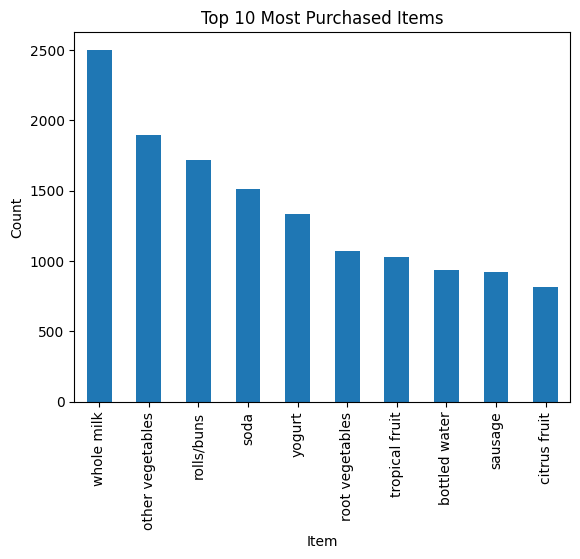

In [14]:
#Plot the graph
import matplotlib.pyplot as plt
top_items = df['itemDescription'].value_counts().head(10)
top_items.plot(kind='bar', title='Top 10 Most Purchased Items')
plt.xlabel("Item")
plt.ylabel("Count")
plt.show()